<a href="https://colab.research.google.com/github/rbeauchamp12/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/11_3_of_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [91]:
#make a column named loan_status_is_great
df['loan_status_is_great']
df['loan_status']=1
df['last_pymnt_d_month']=1
df['last_pymnt_d_year'] =1

df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'int_rate_double', 'emp_title_clean', 'emp_title_manager',
       'issue_d_clean', 'year', 'month', 'weekday', 'loan_status_is_great',
       'last_pymnt_d_month', 'last_pymnt_d_year'],
      dtype='object', length=155)

In [3]:
##### Begin Working Here #####
#this will retrieve the lending club data
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-11-06 16:40:39--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.67M   880KB/s    in 25s     

2019-11-06 16:41:05 (871 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22727580]



In [4]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [5]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [6]:

import pandas as pd
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
df.head()

#skiprows will skip rows from the top of the data set and it has to be defined as to how many rows you want to skip
#skipfooter will skip the bottom rows that you defined
#engine ='python' will display the material in python form

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,...,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,...,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,...,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,...,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3116.62,3116.62,1160.780000,1160.78,...,0.0,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#this will let us know what the shape of the file is 
print(df.shape)
print(df.columns)

(128412, 144)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)


In [0]:
#make a column named loan_status_is_great
df['loan_status_great']

In [8]:
#How much missing data do I have?
#df.isnull() method is used to return the dataset as booleans true or false
#using .sum() will show a list of variables in the dataframe that are missing data
#using .sort() will sort the values from largest to smallest


pd.options.display.max_rows=999 #this will diplay the number of rows up to 999
pd.options.display.max_columns=100 #this will display the number of columns up to 100
df.isnull().sum().sort_values(ascending=False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128320
hardship_type                                 128316
hardship_last_payment_amount                  128316
hardship_payoff_balance_amount                128316
hardship_reason                               128316
hardship_loan_status                          128316
hardship_dpd                                  128316
hardship_length                               128316
payment_plan_start_date                       128316
hardship_end_date                             128316
hardship_start_date                           128316
hardship_amount                               128316
deferral_term                                 128316
hardship_status                               128316
settlement_percentage                         

In [9]:
#this will identify a column that shouldn't be a string
df['int_rate'].head()

0     14.47%
1     22.35%
2     23.40%
3     18.94%
4     10.72%
Name: int_rate, dtype: object

In [10]:
#what is the data type of this column?
#checking the data type of the int_rate
#this is an object which returns alpha numeric values
df['int_rate'].dtype

dtype('O')

In [12]:
#what is the value of the first cell in this column?
#get individual cell information with the loc method
int_rate0 = df.loc[0, 'int_rate']
print(int_rate0)
int_rate0 


 14.47%


' 14.47%'

In [13]:
#using the .strip() method to remove the lead space before the string value
int_rate0.strip()

'14.47%'

In [14]:
#using the strip method twice will remove the % from the string value
int_rate0.strip().strip('%')

'14.47'

In [15]:
#it is always to check the pandas version
pd.__version__

'0.25.3'

In [16]:
#convert from a string to float
float(int_rate0.strip().strip('%'))

14.47

In [17]:
#confirming the changes took effect
print(type(int_rate0.strip().strip('%')))
print(type(float(int_rate0.strip().strip('%'))))

<class 'str'>
<class 'float'>


In [19]:
#defining a function to remove signs from strings and convert to floats
def int_rate_2_float(mystring):
  return float(mystring.strip().strip('%'))

#testing that the function works
int_rate_2_float(int_rate0)

14.47

In [20]:
#applying the function to the whole column
df['int_rate_float']=df['int_rate'].apply(int_rate_2_float)
df.columns 

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float'],
      dtype='object', length=145)

In [21]:
#compare the two columns: old (int_rate) and new ('int_rate_float)
df[['int_rate', 'int_rate_float']].head()

,int_rate,int_rate_float
0,14.47%,14.47
1,22.35%,22.35
2,23.40%,23.40
3,18.94%,18.94
4,10.72%,10.72


In [22]:
#confirm that you can do math 
df['int_rate_double']=df['int_rate_float']*2
df[['int_rate', 'int_rate_float', 'int_rate_double']].sample(5)
#remember that double brackets are needed whenever comparing more than one value

,int_rate,int_rate_float,int_rate_double
66028,11.80%,11.80,23.60
100831,17.97%,17.97,35.94
48901,6.46%,6.46,12.92
15760,7.02%,7.02,14.04
78979,8.46%,8.46,16.92


In [25]:
#this is when we begin to clean the emp_title

#explore the columns
#pandas trick: if you use the double brackets, pandas will automatically format the columns
df[['emp_title', 'int_rate']].sample(6)

,emp_title,int_rate
60505,Nursing Assistant,27.27%
7305,Material handler,18.94%
127970,Prep cook,16.14%
41663,Senior Customer Service Representative,14.47%
7523,Material handler,13.56%
116763,Applications Geophysicist - Sales,14.47%


In [26]:
#using the nunique() method will show all the possible number of titles in the dataset
df['emp_title'].nunique()

43892

In [27]:
#this will show the most popular title 
#use the dropna method to find the most frequent title without a name
df['emp_title'].value_counts(ascending=False, dropna=False).head()

NaN                 20947
Teacher              2090
Manager              1773
Registered Nurse      952
Driver                924
Name: emp_title, dtype: int64

In [28]:
#this will show how many nulls there are in the dataset to be compared to the NaNs
df['emp_title'].isnull().sum()

20947

In [29]:
#see the above null amounts
#use the reverse method that will display the number of titles are valid by using the notnul
df['emp_title'].notnull().sum()

107465

In [30]:
import numpy as np
type(np.NaN)

float

In [35]:
#writing a function to clean up the titles
#the strip method only works on strings and does not work on floats
def clean_title(title):
  #exception handling 
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'

examples=['owner', 'Supervisor', 'Project Manager', np.NaN]

for item in examples:
    print(clean_title(item))

#using the instance method allows you to find out if the item is a particular type
#so using the if statement to return all the string names and if there are no strings(NaN), then it will return unknown

Owner
Supervisor
Project Manager
Unknown


In [36]:
#apply the function to the entire dataframe column now that the function has been tested
#this will create the new column which will post to the end of the data set
df['emp_title_clean']=df['emp_title'].apply(clean_title)

df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float',
       'int_rate_double', 'emp_title_clean'],
      dtype='object', length=147)

In [38]:
#compare the old to the new values
df[['emp_title', 'emp_title_clean']].sample(6)

,emp_title,emp_title_clean
103242,General manager,General Manager
34678,NaN,Unknown
8381,motor vehicle rep,Motor Vehicle Rep
117106,Asst manager,Asst Manager
25135,Accounts payable specialists,Accounts Payable Specialists
52411,NaN,Unknown


In [39]:
#check for the missing data
df['emp_title_clean'].isnull().sum()

0

In [40]:
#checking the value counts
df['emp_title_clean'].value_counts(ascending=False).head()

Unknown             20947
Teacher              2557
Manager              2395
Registered Nurse     1418
Driver               1258
Name: emp_title_clean, dtype: int64

In [43]:
#cleaning the emp_title_manager
df['emp_title_manager']=df['emp_title'].str.contains('Manager')
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'int_rate_float', 'int_rate_double', 'emp_title_clean',
       'emp_title_manager'],
      dtype='object', length=148)

In [44]:
#compare the two columns
df[['emp_title_clean', 'emp_title_manager']].sample(4)

,emp_title_clean,emp_title_manager
35455,Relationship Manager,True
25719,Sales Rep,False
87666,Mod Team Specialist,False
45063,It/System Administrator,False


In [45]:
#finding the missing data for manager
df['emp_title_manager'].isnull().sum()

20947

In [46]:
#in datasets, it is common that dates are formatted as strings
#the .info() method will list all of the columns with the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Columns: 148 entries, id to emp_title_manager
dtypes: float64(59), int64(51), object(38)
memory usage: 145.0+ MB


In [47]:
#.dtypes() will list all of the columsn and their data types
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [50]:
#this will show which columns have a specific dataset.
for col in df.columns:
  if(col.endswith('_date')) or (col.endswith('_d')):
    print(col) #your calling back the variable
    

issue_d
last_pymnt_d
next_pymnt_d
last_credit_pull_d
hardship_start_date
hardship_end_date
payment_plan_start_date
debt_settlement_flag_date
settlement_date


In [51]:
#list comprehension
date_col_list = [col for col in df.columns if col.endswith('_d') or (col.endswith('_date'))]
print(date_col_list)

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date']


In [52]:
#this will show the data type of issue_d
df['issue_d'].dtype

dtype('O')

In [53]:
#this will show the data type in the date format
df.loc[0:10, 'issue_d']

0     Dec-2018
1     Dec-2018
2     Dec-2018
3     Dec-2018
4     Dec-2018
5     Dec-2018
6     Dec-2018
7     Dec-2018
8     Dec-2018
9     Dec-2018
10    Dec-2018
Name: issue_d, dtype: object

In [55]:
#this will convert strings to dates: 
#best practice: if you have named or renamed a variable with clean at the end of it, it is assumed that that it has been cleaned somehow
df['issue_d_clean']=pd.to_datetime(df['issue_d'], infer_datetime_format=True)

#compare the columns
df[['issue_d', 'issue_d_clean']].head()

,issue_d,issue_d_clean
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [56]:
#checking the data type
df['issue_d_clean'].dtype

dtype('<M8[ns]')

In [58]:
#create new values once the data type is corrected
df['year']=df['issue_d_clean'].dt.year

#compare 
df[['issue_d_clean', 'year']].sample(6)

,issue_d_clean,year
84844,2018-10-01,2018
84535,2018-10-01,2018
119500,2018-10-01,2018
76430,2018-11-01,2018
125884,2018-10-01,2018
34520,2018-12-01,2018


In [59]:
#create a month column
df['month']=df['issue_d_clean'].dt.month

#compare the two columns
df[['issue_d_clean', 'month', 'year']].sample(6)

,issue_d_clean,month,year
106250,2018-10-01,10,2018
46573,2018-11-01,11,2018
105905,2018-10-01,10,2018
109801,2018-10-01,10,2018
31826,2018-12-01,12,2018
49437,2018-11-01,11,2018


In [61]:
#create a weekday column
df['weekday']=df['issue_d_clean'].dt.weekday

#compare the columns
df[['issue_d_clean', 'weekday', 'month', 'year']].sample(4)

,issue_d_clean,weekday,month,year
91276,2018-10-01,0,10,2018
87846,2018-10-01,0,10,2018
89189,2018-11-01,3,11,2018
88472,2018-10-01,0,10,2018


In [62]:
#filtering DataFrames
df['emp_title_manager']

0         False
1         False
2           NaN
3         False
4         False
          ...  
128407    False
128408    False
128409    False
128410      NaN
128411     True
Name: emp_title_manager, Length: 128412, dtype: object

In [63]:
#filter by using setting up a condition
condition = df['emp_title_manager']==True

managers=df[condition]
managers.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,int_rate_double,emp_title_clean,emp_title_manager,issue_d_clean,eyar,year,month,weekday
9,NaN,NaN,10450,10450,10450.0,36 months,18.94%,382.74,D,D2,Project Manager,10+ years,MORTGAGE,70000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,371xx,TN,27.38,0,Jul-2007,0,NaN,NaN,11,0,34628,87%,24,w,8361.33,8361.33,3439.170000,3439.17,2088.67,1350.50,0.0,0.0,0.0,Oct-2019,382.74,Nov-2019,Oct-2019,0,...,100.0,100.0,0,0,429450,41288,11800,17500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,37.88,Project Manager,True,2018-12-01,2018,2018,12,5
27,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,...,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,32.28,Production Manager,True,2018-12-01,2018,2018,12,5
40,NaN,NaN,12000,12000,12000.0,36 months,16.14%,422.72,C,C4,Sales Account Manager,4 years,RENT,70000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,18.96,0,Nov-2013,0,NaN,NaN,6,0,13663,61.8%,7,w,9555.15,9555.15,3788.340000,3788.34,2444.85,1343.49,0.0,0.0,0.0,Oct-2019,422.72,Nov-2019,Oct-2019,0,...,100.0,66.7,0,0,56264,34470,18500,34164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,32.28,Sales Account Manager,True,2018-12-01,2018,2018,12,5
42,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,36266.741552,36266.74,35000.00,1266.74,0.0,0.0,0.0,Apr-2019,34712.60,NaN,Oct-2019,0,...,97.4,66.7,0,0,516204,82514,59700,51904,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,25.96,Sr. Vice President -Risk Manager,True,2018-12-01,2018,2018,12,5
46,NaN,NaN,20400,20400,20400.0,60 months,10.33%,436.76,B,B1,Bakery Manager,10+ years,MORTGAGE,140000

In [64]:
#multiple fitlers at once
(df['emp_title_manager']==False) & (df['home_ownership']=='OWN')

0         False
1         False
2         False
3         False
4         False
          ...  
128407    False
128408    False
128409    False
128410    False
128411    False
Length: 128412, dtype: bool

In [65]:
#apply  the above example to the dataframe
subordinates=df[(df['emp_title_manager']==False) & (df['home_ownership']=='OWN')]
subordinates.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,int_rate_double,emp_title_clean,emp_title_manager,issue_d_clean,eyar,year,month,weekday
24,NaN,NaN,30000,30000,30000.0,60 months,26.31%,903.73,E,E4,Casino Host,10+ years,OWN,62000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,37.24,0,Oct-2007,0,NaN,86.0,15,1,18890,39.8%,36,w,0.00,0.00,2645.41,2645.41,754.24,1891.17,0.0,0.0,0.0,Apr-2019,903.73,NaN,Oct-2019,0,...,100.0,14.3,1,0,138354,104590,36400,90854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,26.31,52.62,Casino Host,False,2018-12-01,2018,2018,12,5
41,NaN,NaN,1200,1200,1200.0,36 months,17.97%,43.37,D,D1,Haz Mat S/R,10+ years,OWN,52000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,vacation,Vacation,605xx,IL,25.61,0,Feb-1991,2,NaN,NaN,14,0,18197,48.3%,24,w,957.22,957.22,388.53,388.53,242.78,145.75,0.0,0.0,0.0,Sep-2019,43.37,Oct-2019,Oct-2019,0,...,100.0,66.7,0,0,50041,29964,15700,12341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,35.94,Haz Mat S/R,False,2018-12-01,2018,2018,12,5
47,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.74,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Oct-2019,0,...,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,28.94,Bus Driver,False,2018-12-01,2018,2018,12,5
65,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,22294.87,22294.87,5260.23,5260.23,2705.13,2555.10,0.0,0.0,0.0,Sep-2019,587.82,Oct-2019,Oct-2019,0,...,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,28.94,Teacher,False,2018-12-01,2018,2018,12,5
88,NaN,NaN,9600,9600,9600.0,36 months,15.02%,332.89,C,C3,Fuel truck driver,10+ years,OWN,60000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,087xx,NJ,32.64,1,Oct-2007,1,17.0,NaN,14,0,16424,73%,32,w,7588.95,7588.95,2983.99,29

In [66]:
#this will show the interest rates of the home owner
managers['int_rate_float'].mean()

12.654628339965626

In [67]:
#this will show the interest rates of the subordinates
subordinates['int_rate_float'].mean()

13.251434589800807

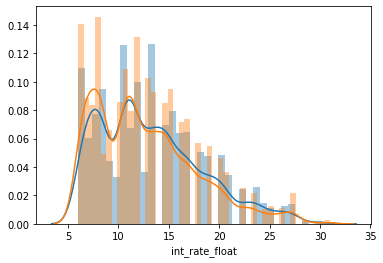

In [68]:
#compare the interest rates of the managers and the subordinates by using seaborn to show a graph
import seaborn as sns
sns.distplot(subordinates['int_rate_float'])
sns.distplot(managers['int_rate_float'])

In [26]:
#this will identify the a column that should be an integer
df['term']

0          36 months
1          36 months
2          60 months
3          36 months
4          36 months
             ...    
128407     36 months
128408     36 months
128409     36 months
128410     36 months
128411     36 months
Name: term, Length: 128412, dtype: object

In [14]:
#this will check the data type of the column
df['term'].dtype



dtype('O')

In [15]:
#this will get the value of the first cell in the column
#you can use the loc method to get individual cell information
#the loc method requires that you call the first row by index, then specify the column name to be called
term=df.loc[0, 'term']
print(term)
term

 36 months


' 36 months'

In [17]:
#this will remove the lead space 
term.strip()

'36 months'

In [43]:
df['months'] = df['term'].str.strip('months').astype(int)
df['months']


0         36
1         36
2         60
3         36
4         36
          ..
128407    36
128408    36
128409    36
128410    36
128411    36
Name: months, Length: 128412, dtype: int64

In [45]:
df['months'].dtype

dtype('int64')

In [47]:
#this will create a function that will be applied to the whole column
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_last_payment_amount', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'int_months', 'months'],
      dtype='object', length=146)

In [48]:
df[['term', 'months']].head()

,term,months
0,36 months,36
1,36 months,36
2,60 months,60
3,36 months,36
4,36 months,36


In [49]:
#clean up title
df[['months', 'term']].sample(5)

,months,term
101273,36,36 months
11123,60,60 months
106420,36,36 months
25482,36,36 months
49295,60,60 months


In [0]:
#create

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01